<a href="https://colab.research.google.com/github/Anvayt24/frame-generation-/blob/main/framegen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
frames_folder = "/content/drive/MyDrive/ColabNotebooks/frames_dataset/frames"
frames =[]

preprocessing images

In [ ]:
for img_name in sorted(os.listdir(frames_folder)):
  img_path = os.path.join(frames_folder,img_name)
  img = cv2.imread(img_path)
  img_resized = cv2.resize(img,(64,64))
  img_normalized = img_resized/255.0
  frames.append(img_normalized)


In [ ]:
frames = np.array(frames) #converted tto numpy array

In [ ]:
X = frames[ :-1]
y = frames[1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

CNN building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
model =   Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(64 , 64 , 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3*64*64,activation='sigmoid'))
model.add(tf.keras.layers.Reshape((64, 64 , 3)))

In [ ]:
model.compile(optimizer='adam' , loss='mse' , metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=16,validation_data=(X_test,y_test)) #training

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 599ms/step - accuracy: 0.3401 - loss: 0.0099 - val_accuracy: 0.3991 - val_loss: 0.0072
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4917 - loss: 0.0057 - val_accuracy: 0.6091 - val_loss: 0.0031
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5907 - loss: 0.0030 - val_accuracy: 0.6768 - val_loss: 0.0027
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7069 - loss: 0.0026 - val_accuracy: 0.7716 - val_loss: 0.0024
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7777 - loss: 0.0024 - val_accuracy: 0.8143 - val_loss: 0.0023
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8307 - loss: 0.0024 - val_accuracy: 0.8882 - val_loss: 0.0023
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8995 - loss: 0.0023 - val_accuracy: 0.9228 - val_loss: 0.0023
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9274 - loss: 0.0023 - val_accuracy: 0.9348 - val_loss: 0.002

In [ ]:
loss = model.evaluate(X_test,y_test) #evaluating
print(loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step - accuracy: 0.9369 - loss: 0.0023
[0.0022528988774865866, 0.9369118213653564]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


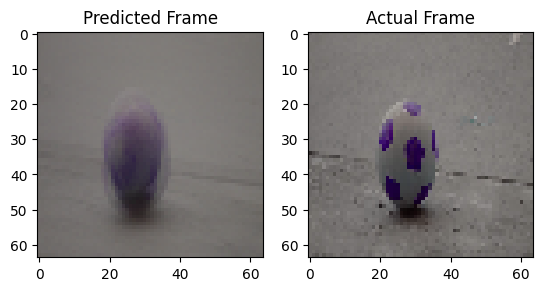

In [ ]:
sample_img = X_test[1].reshape(1,64,64,3)
prediction = model.predict(sample_img)
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.title("Predicted Frame")
plt.imshow(prediction[0])
plt.subplot(1, 2, 2)
plt.title("Actual Frame")
plt.imshow(y_test[0])
plt.show()